# Day 14 – Borel–Cantelli Lemma & Chebyshev's Inequality (Practical)

This notebook gives you **hands-on simulations** to internalize two core probability results used across quant finance and risk:

- **Borel–Cantelli Lemma**: When do (rare) events happen finitely vs infinitely often?
- **Chebyshev’s Inequality**: A distribution-free bound on tail probabilities.

---

## Learning Objectives
- Build intuition for **series of rare events** (Borel–Cantelli).
- Quantify tail risk with **Chebyshev’s bound** and compare to empirical frequency.
- Connect both ideas to **risk management** and **back-of-the-envelope** controls when distributional assumptions are weak.

## Key Concepts
- **Borel–Cantelli (BC)**:
  - If $\sum_n P(A_n) < \infty$, then **only finitely many** $A_n$ occur (a.s.).
  - If $\sum_n P(A_n) = \infty$ and $A_n$ are independent, then **infinitely many** occur (a.s.).
- **Chebyshev’s Inequality**:
  - For any r.v. with mean $\mu$ and std $\sigma$:  
    $ P(|X-\mu| \ge k\sigma) \le \frac{1}{k^2} $  
  - **Distribution-free**: holds beyond normality; useful for conservative risk bounds.


## Part 1 — Borel–Cantelli via Simulation

We simulate two sequences of independent events $A_n$ with probabilities:

- **Convergent case**: $p_n = 1/n^2$ → $\sum p_n < \infty$ ⇒ finitely many occurrences (a.s.).
- **Divergent case**: $p_n = 1/n$ → $\sum p_n = \infty$ ⇒ infinitely many (a.s., under independence).

We'll check **cumulative counts** and growth.

Convergent case (sum p_n finite): total occurred = 1 (should stay bounded)
Divergent case (sum p_n infinite): total occurred ≈ 12 (should keep growing)


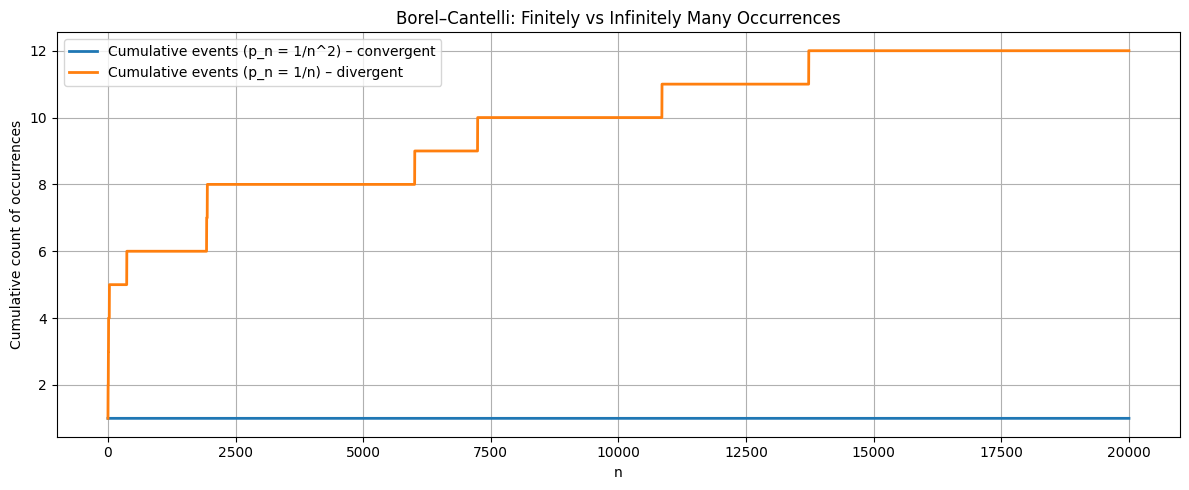

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 20_000  # number of trials
n = np.arange(1, N+1)

# Probabilities
p_conv = 1 / (n**2)     # convergent series
p_div  = 1 / (n)        # divergent series

# Simulate events: A_n occurs if U_n < p_n
U = np.random.rand(N)
events_conv = (U < p_conv).astype(int)
U2 = np.random.rand(N)
events_div = (U2 < p_div).astype(int)

cum_conv = np.cumsum(events_conv)
cum_div  = np.cumsum(events_div)

print(f"Convergent case (sum p_n finite): total occurred = {cum_conv[-1]} (should stay bounded)")
print(f"Divergent case (sum p_n infinite): total occurred ≈ {cum_div[-1]} (should keep growing)")

# Plot cumulative occurrences
plt.figure(figsize=(12,5))
plt.plot(n, cum_conv, label='Cumulative events (p_n = 1/n^2) – convergent', linewidth=2)
plt.plot(n, cum_div,  label='Cumulative events (p_n = 1/n) – divergent', linewidth=2)
plt.xlabel('n')
plt.ylabel('Cumulative count of occurrences')
plt.title('Borel–Cantelli: Finitely vs Infinitely Many Occurrences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation**  
- In the **convergent** case, the cumulative count **plateaus** (only finitely many events).  
- In the **divergent** case, the count **keeps growing** with $n$: we see infinitely many occurrences in the limit.

**Why it matters in quant?**  
- Think of $A_n$ as **breaches** (e.g., daily VaR exceedances) with time-varying small probabilities. BC helps reason about whether such breaches are **rare forever** or **keep happening** under independence and tail behavior.

## Part 2 — Chebyshev’s Inequality (Empirical vs Bound)

We draw samples from a **non-normal** distribution (Uniform[0, 100]) to emphasize Chebyshev does **not** assume normality.  
We measure the empirical probability of being at least $k\sigma$ away from the mean and compare with the bound $1/k^2$.

k    Empirical P(|X-μ| >= kσ)    Chebyshev bound 1/k^2
1                        0.422425               1.000000
1.5                      0.133615               0.444444
2                        0.000000               0.250000
3                        0.000000               0.111111


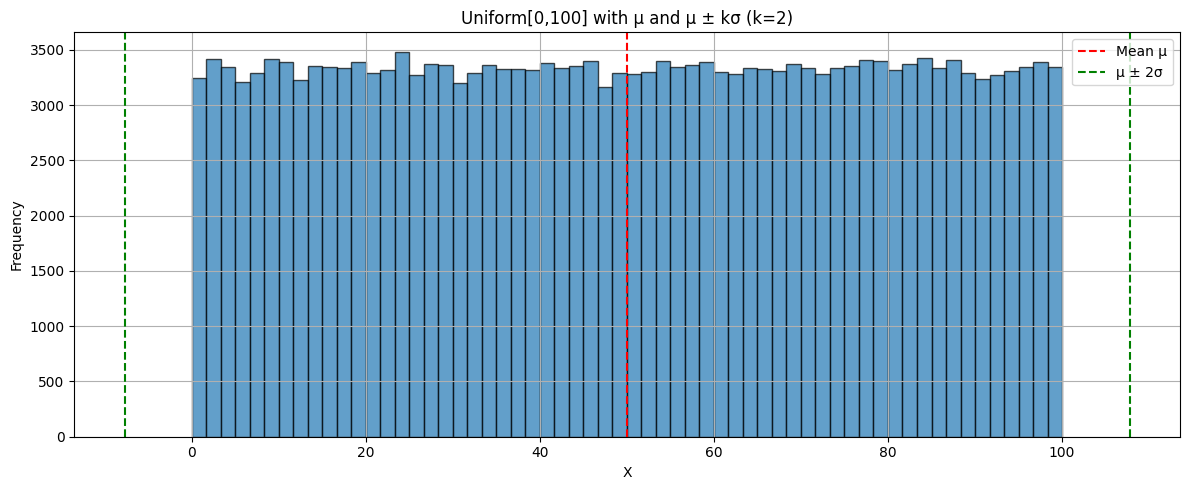

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Non-normal data
X = np.random.uniform(0, 100, size=200_000)
mu = X.mean()
sigma = X.std(ddof=0)

# Try multiple k
ks = [1, 1.5, 2, 3]
empirical = []
bounds = []

for k in ks:
    prob = (np.abs(X - mu) >= k * sigma).mean()
    empirical.append(prob)
    bounds.append(1 / (k**2))

# Display results
print("k    Empirical P(|X-μ| >= kσ)    Chebyshev bound 1/k^2")
for k, e, b in zip(ks, empirical, bounds):
    print(f"{k:<4} {e:>28.6f} {b:>22.6f}")

# Visual: histogram and mean ± kσ bands for k=2
k_show = 2
plt.figure(figsize=(12,5))
plt.hist(X, bins=60, edgecolor='black', alpha=0.7)
plt.axvline(mu, color='red', linestyle='--', label='Mean μ')
plt.axvline(mu - k_show*sigma, color='green', linestyle='--', label=f'μ ± {k_show}σ')
plt.axvline(mu + k_show*sigma, color='green', linestyle='--')
plt.title('Uniform[0,100] with μ and μ ± kσ (k=2)')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

### Takeaways
- **Borel–Cantelli** gives a yes/no asymptotic view on whether rare events keep happening.
- **Chebyshev** offers distribution-agnostic **tail bounds**: crude but safe.
- Together, they’re handy **backstops** when model assumptions are weak.

